In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/CL/CT')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Library needed for calculating wasserstein embedding
!pip install pot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 664 kB 5.0 MB/s 


In [2]:
from dissimilarity import *

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Loading tasks

In [4]:
data_98_1 = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/98waitStates/T1a/RANDOM_T1.npy')
data_98_1.shape

(50000, 146)

In [6]:
data_98_1a = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/98waitStates/T1b/RANDOM_T1a.npy')
data_98_2 = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/98waitStates/T2a/RANDOM_T2.npy')
data_98_2a = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/98waitStates/T2b/RANDOM_T2a.npy')
data_8_1 = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/8waitStates/T1a/10_imgsWaits_RANDOM_T1.npy')
data_8_1a = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/8waitStates/T1b/10_imgsWaits_RANDOM_T1a.npy')
data_8_2 = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/8waitStates/T2a/10_imgsWaits_RANDOM_T2.npy')
data_8_2a = np.load('CT-Graph_Datasets_v0/RANDOM_POLICY/8waitStates/T2b/10_imgsWaits_RANDOM_T2a.npy')

In [7]:
opt_data_0 = np.load('CT-Graph_Datasets_v0/OPTIMAL_POLICY/T1aG0/OPTIMAL_T1aG0.npy')
opt_data_1 = np.load('CT-Graph_Datasets_v0/OPTIMAL_POLICY/T1aG1/OPTIMAL_T1aG1.npy')
opt_data_2 = np.load('CT-Graph_Datasets_v0/OPTIMAL_POLICY/T1aG2/OPTIMAL_T1aG2.npy')
opt_data_3 = np.load('CT-Graph_Datasets_v0/OPTIMAL_POLICY/T1aG3/OPTIMAL_T1aG3.npy')

## Fixing reference for all tasks
### Note that the dimension of the reference depends on the dimension of the tasks.

In [9]:
torch.manual_seed(98)
reference = torch.rand(500, 148)

100%|██████████| 5/5 [06:25<00:00, 77.14s/it]


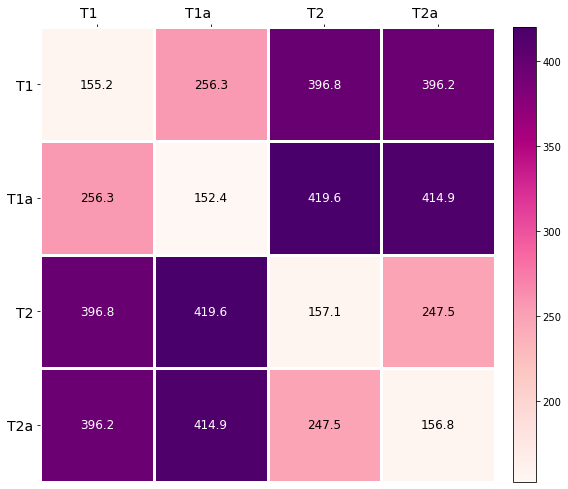

In [10]:
tasks = {}
tasks['T1'] = data_8_1
tasks['T1a'] = data_8_1a
tasks['T2'] = data_8_2
tasks['T2a'] = data_8_2a

d = dissimilarity(reference, device, one_hot=False, normalized=False)
dist = d.pwdist(tasks)